## Import Library & Data

In [139]:
#Import Library
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [92]:
df = pd.read_csv("data/data.csv")
df.head()

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
0,36.1,Normal,89,Female,24.0,No,Yes,No,No,Yes,No,Yes,81.4,430,Moderate,Vegan,72,Normal,NaN,Ibuprofen
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
2,36.4,Normal,92,Male,27.8,No,No,No,No,No,No,Yes,73.7,400,Sedentary,Vegan,85,High,NaN,Ibuprofen
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen


## Exploratory Data Analysis

In [7]:
df.describe()

,Temperature,Age,BMI,Humidity,AQI,Heart_Rate
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,38.09890,51.152000,26.44320,60.594400,248.493000,80.14400
std,1.13887,28.873354,4.90115,17.058475,143.705244,11.79196
min,36.00000,1.000000,18.00000,30.000000,0.000000,60.00000
25%,37.20000,26.000000,22.40000,46.600000,127.750000,70.00000
50%,38.20000,51.000000,26.50000,60.950000,247.500000,80.00000
75%,39.10000,76.000000,30.52500,74.725000,375.250000,90.00000
max,40.00000,100.000000,35.00000,90.000000,499.000000,100.00000


In [99]:
#Checking null and dupe data
df.isnull().sum()

Temperature                 0
Fever_Severity              0
Age                         0
Gender                      0
BMI                         0
Headache                    0
Body_Ache                   0
Fatigue                     0
Chronic_Conditions          0
Allergies                   0
Smoking_History             0
Alcohol_Consumption         0
Humidity                    0
AQI                         0
Physical_Activity           0
Diet_Type                   0
Heart_Rate                  0
Blood_Pressure              0
Previous_Medication       237
Recommended_Medication      0
dtype: int64

In [12]:
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [100]:
#Remove Null data
df = df.dropna()
df.isnull().sum()

Temperature               0
Fever_Severity            0
Age                       0
Gender                    0
BMI                       0
Headache                  0
Body_Ache                 0
Fatigue                   0
Chronic_Conditions        0
Allergies                 0
Smoking_History           0
Alcohol_Consumption       0
Humidity                  0
AQI                       0
Physical_Activity         0
Diet_Type                 0
Heart_Rate                0
Blood_Pressure            0
Previous_Medication       0
Recommended_Medication    0
dtype: int64

### Categorical Data

In [101]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col}:\n{df[col].value_counts()}\n")

Fever_Severity:
Fever_Severity
High Fever    411
Normal        202
Mild Fever    150
Name: count, dtype: int64

Gender:
Gender
Male      385
Female    378
Name: count, dtype: int64

Headache:
Headache
Yes    392
No     371
Name: count, dtype: int64

Body_Ache:
Body_Ache
Yes    399
No     364
Name: count, dtype: int64

Fatigue:
Fatigue
No     382
Yes    381
Name: count, dtype: int64

Chronic_Conditions:
Chronic_Conditions
Yes    409
No     354
Name: count, dtype: int64

Allergies:
Allergies
No     398
Yes    365
Name: count, dtype: int64

Smoking_History:
Smoking_History
Yes    382
No     381
Name: count, dtype: int64

Alcohol_Consumption:
Alcohol_Consumption
Yes    400
No     363
Name: count, dtype: int64

Physical_Activity:
Physical_Activity
Active       276
Sedentary    247
Moderate     240
Name: count, dtype: int64

Diet_Type:
Diet_Type
Non-Vegetarian    265
Vegan             250
Vegetarian        248
Name: count, dtype: int64

Blood_Pressure:
Blood_Pressure
High      264
Normal    

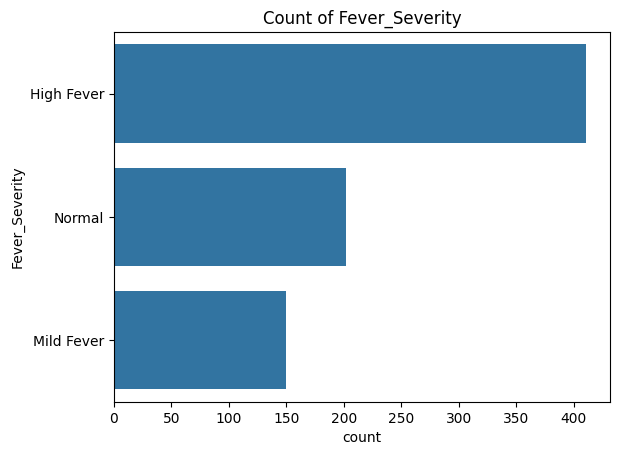

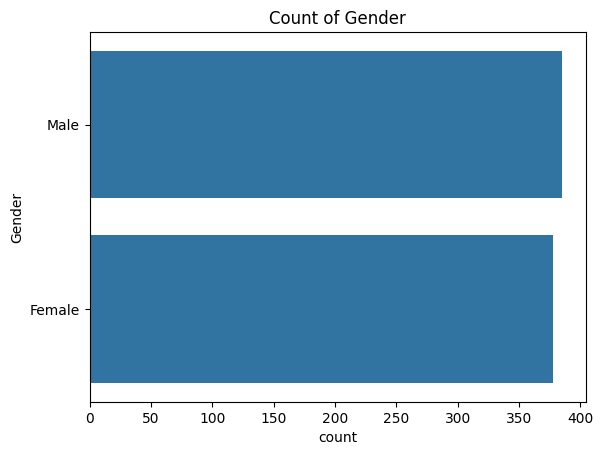

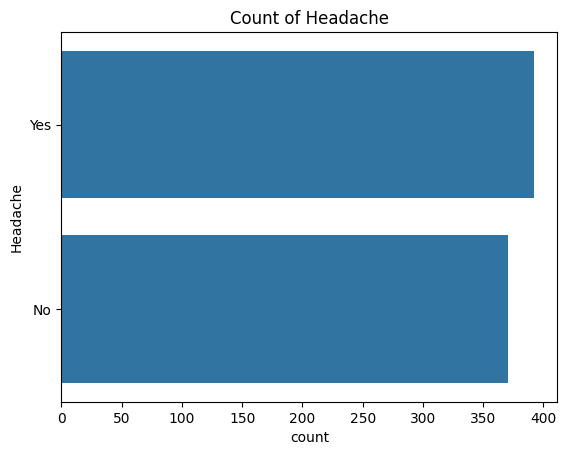

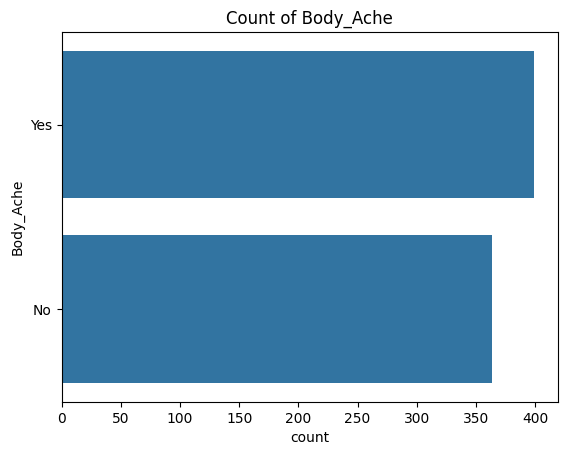

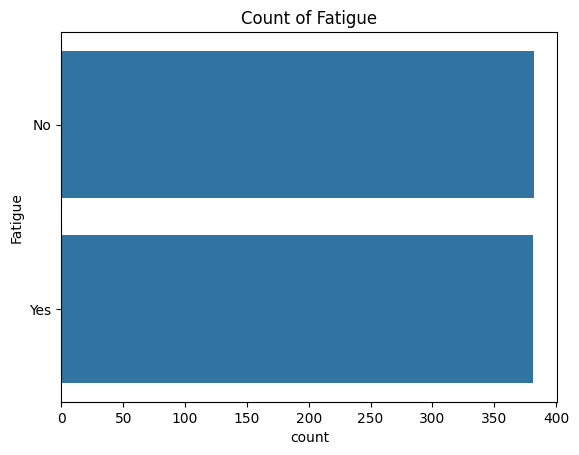

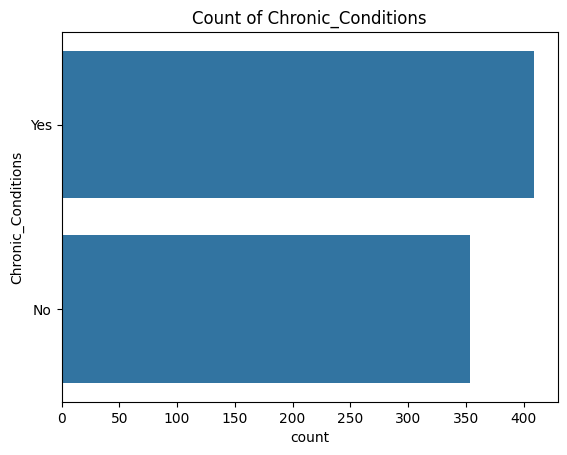

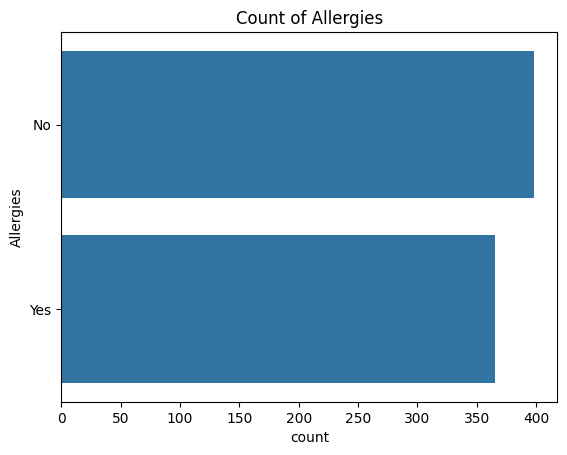

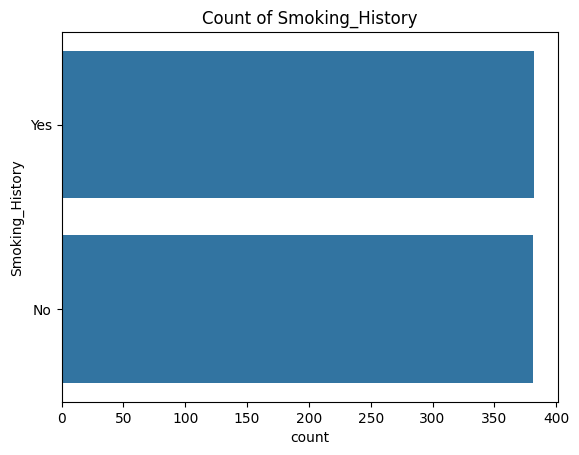

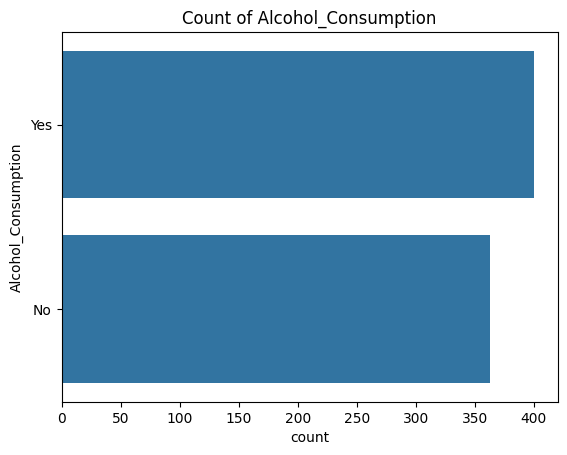

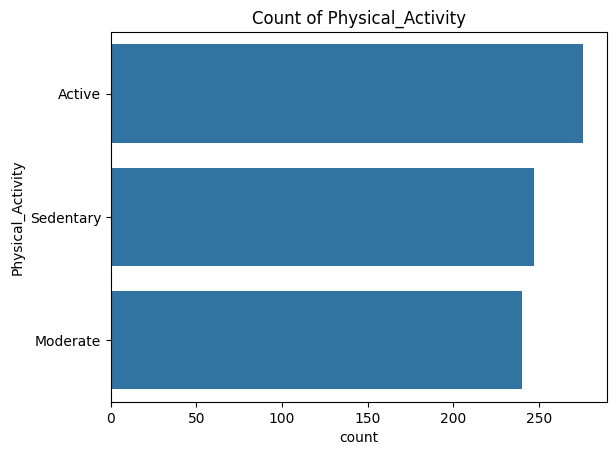

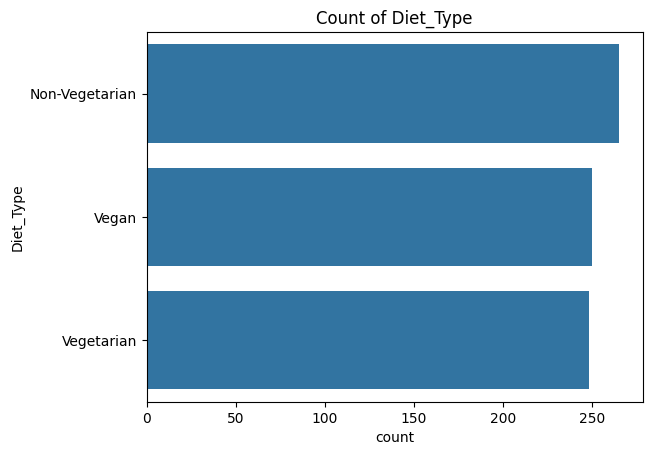

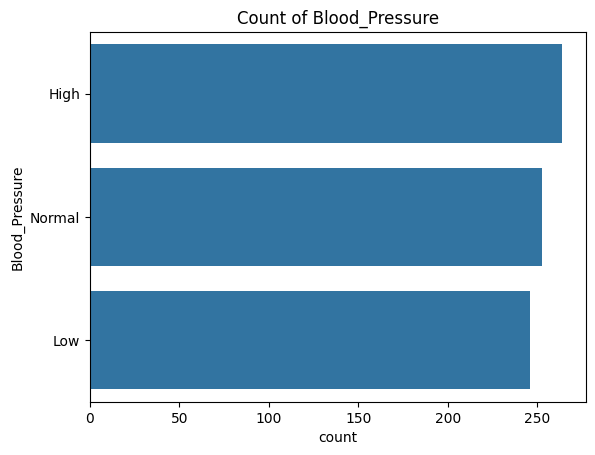

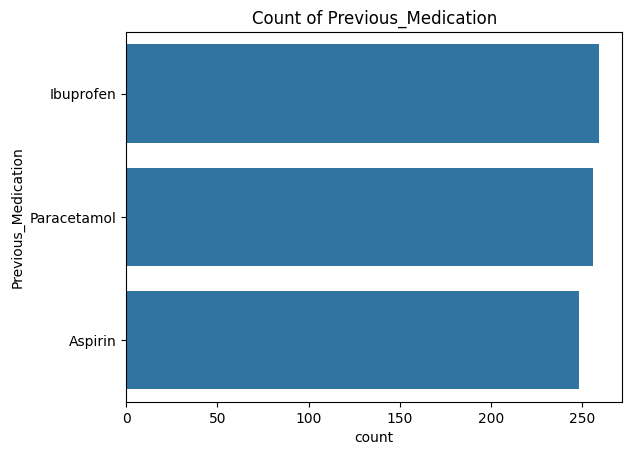

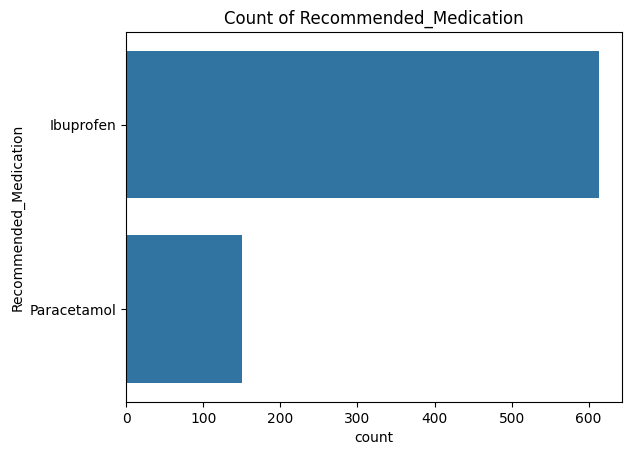

In [102]:
for col in categorical_cols:
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()

### Numerical Data

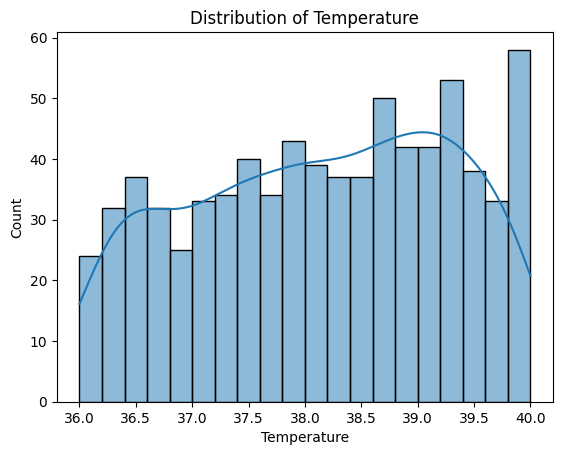

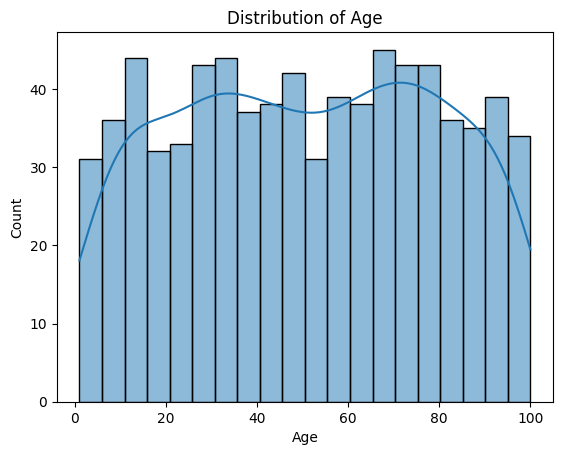

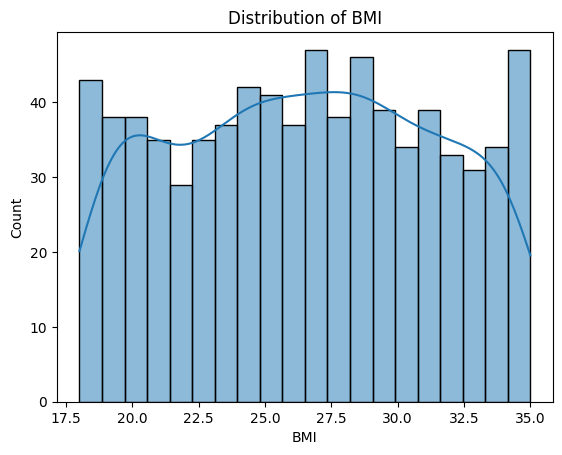

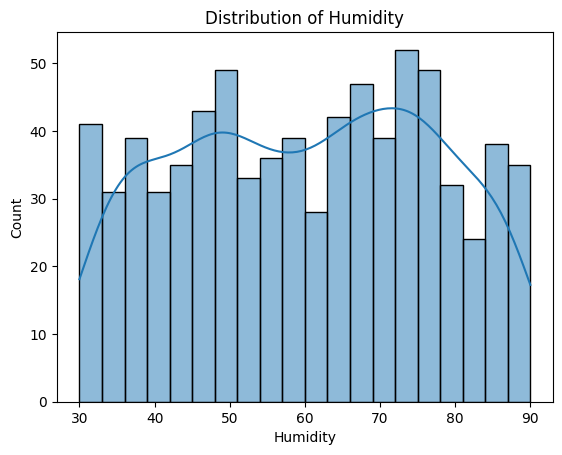

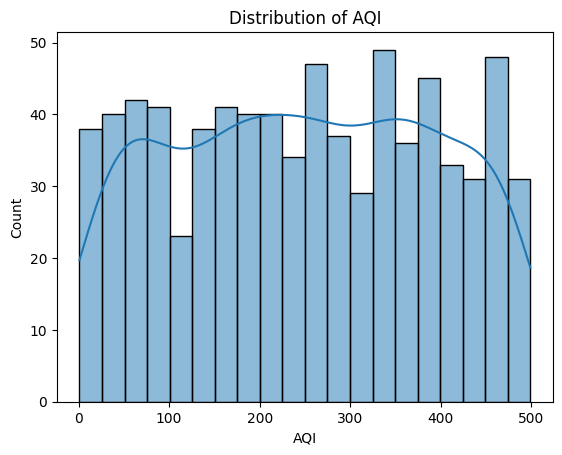

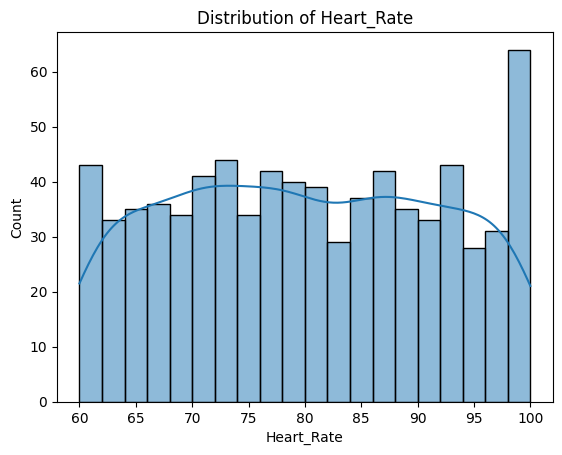

In [103]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

## Preprocessing

In [104]:
df.head()

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
1,37.5,Mild Fever,94,Male,26.6,No,No,No,Yes,No,Yes,Yes,44.4,10,Active,Vegetarian,62,High,Ibuprofen,Paracetamol
3,39.8,High Fever,66,Male,18.7,No,Yes,No,No,No,No,No,44.1,438,Active,Non-Vegetarian,96,High,Ibuprofen,Ibuprofen
4,39.3,High Fever,28,Male,21.0,No,Yes,No,Yes,Yes,Yes,Yes,65.9,451,Active,Vegetarian,85,Low,Paracetamol,Ibuprofen
6,39.1,High Fever,63,Male,18.5,Yes,No,No,No,Yes,No,Yes,71.8,133,Moderate,Vegetarian,70,Low,Paracetamol,Ibuprofen
7,39.9,High Fever,54,Female,20.7,No,Yes,Yes,No,No,Yes,Yes,39.8,67,Active,Vegetarian,72,Normal,Ibuprofen,Ibuprofen


In [105]:
#Encode data kategorikal menjadi numerikal 
le = LabelEncoder()

def enkod(df, kolom):
    df[kolom] = le.fit_transform(df[kolom])

for kolom in df.select_dtypes(include=['object']).columns:
    enkod(df, kolom)

df

,Temperature,Fever_Severity,Age,Gender,BMI,Headache,Body_Ache,Fatigue,Chronic_Conditions,Allergies,Smoking_History,Alcohol_Consumption,Humidity,AQI,Physical_Activity,Diet_Type,Heart_Rate,Blood_Pressure,Previous_Medication,Recommended_Medication
1,37.5,1,94,1,26.6,0,0,0,1,0,1,1,44.4,10,0,2,62,0,1,1
3,39.8,0,66,1,18.7,0,1,0,0,0,0,0,44.1,438,0,0,96,0,1,0
4,39.3,0,28,1,21.0,0,1,0,1,1,1,1,65.9,451,0,2,85,1,2,0
6,39.1,0,63,1,18.5,1,0,0,0,1,0,1,71.8,133,1,2,70,1,2,0
7,39.9,0,54,0,20.7,0,1,1,0,0,1,1,39.8,67,0,2,72,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,36.1,2,78,0,21.5,0,1,0,0,0,0,0,77.6,471,0,1,67,2,1,0
992,36.4,2,31,1,26.7,0,0,0,0,0,0,1,58.0,449,2,1,98,2,2,0
993,37.5,1,91,0,19.2,1,1,1,0,1,0,0,65.4,473,1,2,87,2,2,1
994,37.5,1,47,0,29.0,1,1,0,1,1,1,1,58.0,31,0,2,94,2,1,1


<Axes: >

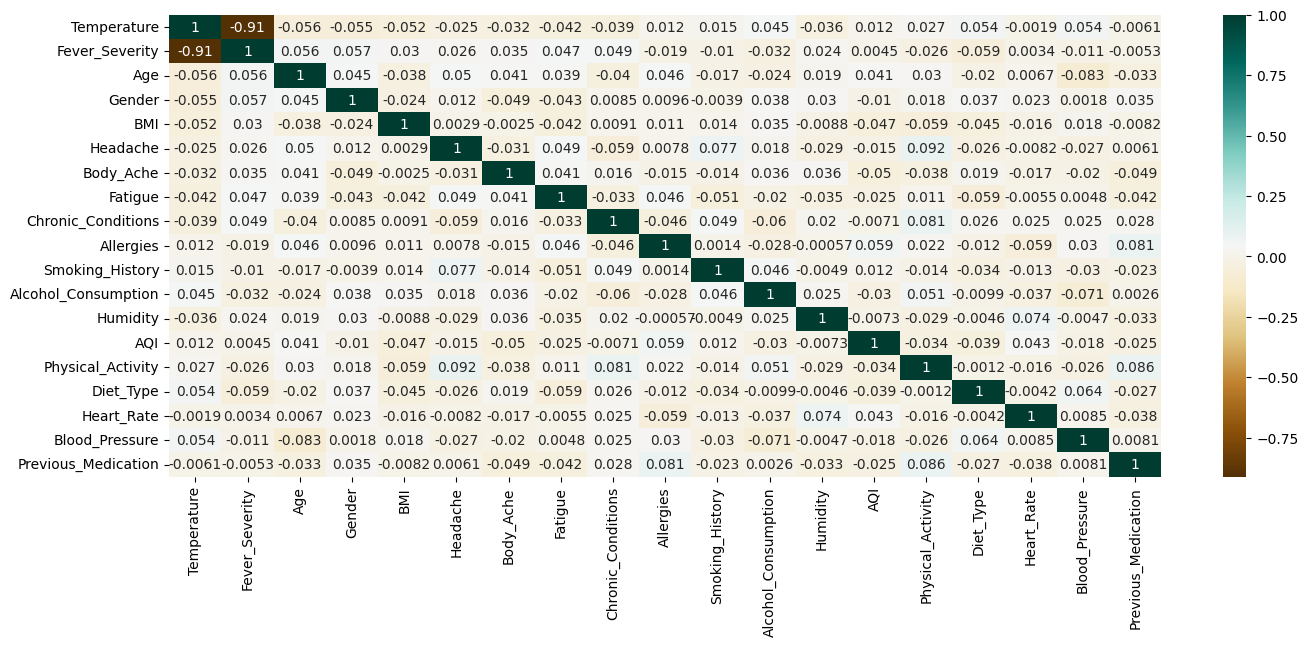

In [106]:
plt.figure(figsize=(16, 6))
korelasi = df.drop(["Recommended_Medication"], axis = 1).corr()
sns.heatmap(korelasi, cmap="BrBG", annot=True)

## Modelling

In [166]:
#Dimension Reduction using PCA with 6 features
# Train Test Split 
X = df.drop(["Recommended_Medication"], axis = 1)
y = df["Recommended_Medication"]

pca = PCA(n_components=5)

scaler = StandardScaler() 
x_scaled = scaler.fit_transform(X)

new_x = pca.fit_transform(x_scaled)

X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.3, random_state=42)

In [167]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [168]:
#DecisionTree 
dtre = DecisionTreeClassifier(max_depth=10, random_state=42)
dtre.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [169]:
#RandomForest
rndm_forest = RandomForestClassifier(max_depth=10, random_state=42)
rndm_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [170]:
#Extratree
extra_tree = ExtraTreeClassifier(max_depth=10, random_state=42)
extra_tree.fit(X_train,y_train)

ExtraTreeClassifier(max_depth=10, random_state=42)

In [171]:
#Checking Accuracy of 4 Models 

y_pred_lr = lr.predict(X_test)
akurasi_lr = accuracy_score(y_test, y_pred_lr)
y_pred_dtr = dtre.predict(X_test)
akurasi_dtr = accuracy_score(y_test, y_pred_dtr)
y_pred_rfor = rndm_forest.predict(X_test)
akuras_rfor = accuracy_score(y_test, y_pred_rfor)
y_pred_etree = extra_tree.predict(X_test)
akurasi_etree = accuracy_score(y_test, y_pred_etree)

print(f"Accuracy Comparison Of 4 Models\nAkurasi Regresi Logistik : {akurasi_lr:.5f}\nAkurasi Decision Tree : {akurasi_dtr:.5f}\nAkurasi Random Forest : {akuras_rfor:.5f}\nAkurasi Extra Tree : {akurasi_etree:.5f}")

Accuracy Comparison Of 4 Models
Akurasi Regresi Logistik : 0.79039
Akurasi Decision Tree : 0.99127
Akurasi Random Forest : 0.99127
Akurasi Extra Tree : 0.90393


In [177]:
#Trying Predict

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

data_test = pd.DataFrame({
    'Temperature': [37.5, 38.0],
    'Fever_Severity': [2, 3],
    'Age': [25, 40],
    'Gender': ['Male', 'Female'],  # Belum di-encode
    'BMI': [22.5, 27.8],
    'Headache': ['Yes', 'No'],  # Belum di-encode
    'Body_Ache': ['Yes', 'Yes'],  # Belum di-encode
    'Fatigue': ['Yes', 'Yes'],  # Belum di-encode
    'Chronic_Conditions': ['No', 'Yes'],  # Belum di-encode
    'Allergies': ['No', 'No'],  # Belum di-encode
    'Smoking_History': ['Yes', 'No'],  # Belum di-encode
    'Alcohol_Consumption': ['No', 'Yes'],  # Belum di-encode
    'Humidity': [60, 55],
    'AQI': [150, 200],
    'Physical_Activity': [3, 2],
    'Diet_Type': ['Vegetarian', 'Non-Vegetarian'],  # Belum di-encode
    'Heart_Rate': [72, 85],
    'Blood_Pressure': [120, 140],
    'Previous_Medication': ['No', 'Yes']  # Belum di-encode
})

# 1. Encode Fitur Kategorikal
encoder = LabelEncoder()
for kolom in data_test.select_dtypes(include=['object']).columns:
    data_test[kolom] = encoder.fit_transform(data_test[kolom])

# 2. Skalasi Data
data_test_scaled = scaler.transform(data_test)

# 3. Transformasi PCA
data_test_pca = pca.transform(data_test_scaled)  # Asumsikan PCA sudah dilatih sebelumnya

# 4. Prediksi Menggunakan Model
prediksi = dtre.predict(data_test_pca)

invers_predik = le.inverse_transform(prediksi)
# Output Prediksi
print("Prediksi:",invers_predik)


Prediksi: ['Ibuprofen' 'Ibuprofen']
